# 환경 준비

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import glob

# 그래프 기본 설정
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(style='whitegrid', font='Malgun Gothic')

C:\Users\njh26\AppData\Local\Temp\ipykernel_11244\230800044.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 데이터 불러오기
path = r'C:\Users\njh26\Desktop\EDA_local_food'
files = glob.glob(path + '/전라북도 완주군_로컬푸드 품목별 일별 판매현황_20221216/*.csv')
# 2020년 1월 1일부터 2022년 10월 31일까지의 판매데이터
df_list = []

for filepath in files:
    # print(filepath)
    # C:\Users\njh26\Desktop\EDA_seoul_cycle/전라북도 완주군_로컬푸드 품목별 일별 판매현황_20221216\완주군_로컬푸드_품목별_일별_판매현황(wanju_localfood_sales_daily)_v4_01.csv
    df_one_file = pd.read_csv(filepath, encoding = 'cp949')
    df_list.append(df_one_file)

# 데이터 병합
df = pd.concat(df_list, axis = 0, ignore_index=True)

# 데이터 구조 파악

In [3]:
print(df.shape)
print(df.head())

(16696845, 8)
        판매연월일  판매시간(SALETIME) 판매매장(SALESTORE) 판매품목(SALEPRODUCT)  \
0  2022-02-04            1346           하가직매장          표고버섯(배지)   
1  2022-02-04            1346           하가직매장                딸기   
2  2022-02-04            1346           하가직매장             새송이버섯   
3  2022-02-04            1346           하가직매장                스콘   
4  2022-02-04            1346           하가직매장               토마토   

  판매단위(SALEUNIT)  판매단가(SALEUNITPRICE)  판매수량)SALEQY  판매금액(SALEPRICE)  
0          200 g               3500.0            1             3500  
1           1 Kg              13000.0            1            13000  
2          500 g               2900.0            1             2900  
3          180 g               3500.0            1             3500  
4         1.5 Kg               7500.0            1             7500  


In [4]:
print(df.isnull().sum())

판매연월일                  0
판매시간(SALETIME)         0
판매매장(SALESTORE)        0
판매품목(SALEPRODUCT)      0
판매단위(SALEUNIT)         0
판매단가(SALEUNITPRICE)    0
판매수량)SALEQY            0
판매금액(SALEPRICE)        0
dtype: int64


# 데이터 전처리

In [5]:
# 컬럼명 변경
new_columns = ['연월일', '시간', '매장', '품목', '단위', '단가', '수량', '금액']
df.columns = new_columns
print(df.columns)

Index(['연월일', '시간', '매장', '품목', '단위', '단가', '수량', '금액'], dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16696845 entries, 0 to 16696844
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   연월일     object 
 1   시간      int64  
 2   매장      object 
 3   품목      object 
 4   단위      object 
 5   단가      float64
 6   수량      int64  
 7   금액      int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1019.1+ MB
None


매장
효자직매장    31299780996
하가직매장    14451511906
모악직매장    14253277909
삼천직매장     8896477663
둔산직매장     4801435856
Name: 금액, dtype: int64


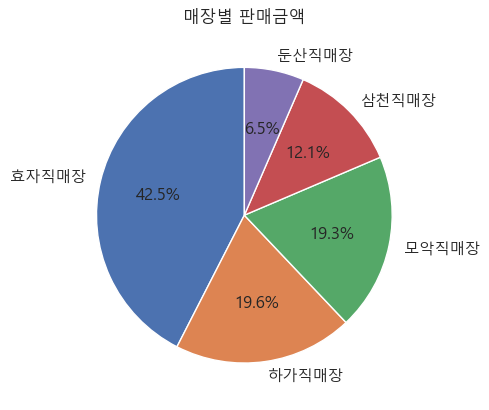

In [7]:
grouped_store = df.groupby(['매장'])['금액'].sum().sort_values(ascending=False)
print(grouped_store)
plt.pie(grouped_store, labels=grouped_store.index, autopct='%1.1f%%', startangle=90)
plt.title('매장별 판매금액')
plt.show()

In [8]:
grouped_store = df.groupby(['매장'])['수량'].sum().sort_values(ascending=False)
print(grouped_store)

매장
효자직매장    8065539
하가직매장    3797743
모악직매장    3733379
삼천직매장    2596293
둔산직매장    1314591
Name: 수량, dtype: int64


### 효자, 하가, 모약, 삼천, 둔산 순으로 판매금액이 높으며 효자직매장이 압도적으로 높음
### 판매수량 또한 유사한 것으로 보아 단가로 인해 발생한 결과는 아닌 것으로 판단됨

품목
딸기           7051183500
대추토마토        2188508550
두부           1892630554
토마토          1494261350
한우양지(국내산)    1207437960
블루베리         1059914404
백미           1025976800
양파           1022477880
깻잎            881401000
수박            825064350
Name: 금액, dtype: int64


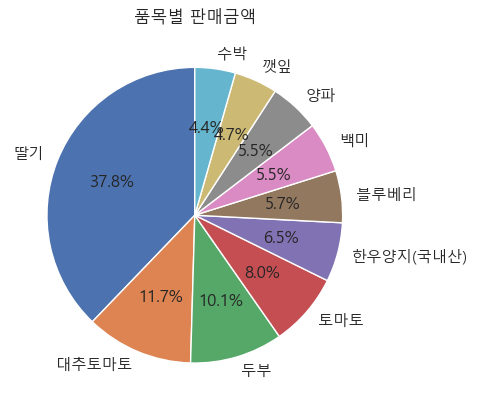

In [9]:
grouped_item = df.groupby(['품목'])['금액'].sum().sort_values(ascending=False)

'''
# 기타를 포함하여 표현할 경우, 기타가 너무 많음
top_items = grouped_item.nlargest(20)
other_items = grouped_item.drop(top_items.index).sum()
top_items['기타'] = other_items
print(top_items)
'''

top_items = grouped_item.iloc[:10]
print(top_items)

plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=90)
plt.title('품목별 판매금액')
plt.show()

### 상위 10개 판매금액을 봤을 때 딸기가 약 38% 가량으로 높은 비율을 차지함

품목
깻잎          854553
상추          719381
딸기          667985
두부          615294
대파          539217
종량제봉투20L    431927
양파          417566
당근          376783
청양고추        321761
대추토마토       310593
Name: 수량, dtype: int64


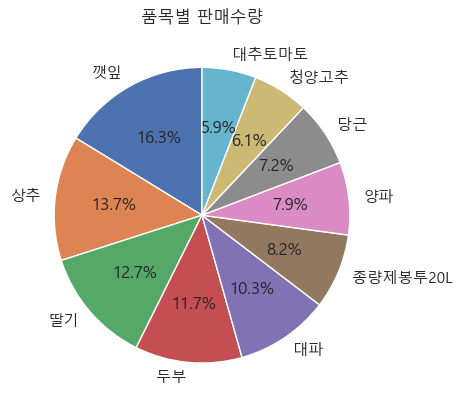

In [10]:
grouped_item = df.groupby(['품목'])['수량'].sum().sort_values(ascending=False)
top_items = grouped_item.iloc[:10]
print(top_items)

plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=90)
plt.title('품목별 판매수량')
plt.show()

### 상위 10개 판매수량을 봤을 때 꺳잎, 상추, 딸기, 두부, 대파 순으로 일상적으로 소비되는 상품들이 상위권을 차지함
### 깻잎과 상추의 단가보다 딸기의 단가가 비교적 높기 때문으로 판단됨

In [11]:
filtered_df = df[df['품목'].isin(['깻잎', '상추', '딸기'])]
grouped_item = filtered_df.groupby(['품목'])['단가'].mean()
print(top_items)

품목
깻잎          854553
상추          719381
딸기          667985
두부          615294
대파          539217
종량제봉투20L    431927
양파          417566
당근          376783
청양고추        321761
대추토마토       310593
Name: 수량, dtype: int64


### 딸기의 단가가 상추와 꺳잎보다 약 10배 가량 높음

In [12]:
filtered_df = df[df['매장'] == '효자직매장']
filtered_df_grouped_item = filtered_df.groupby(['품목'])['금액'].sum().sort_values(ascending=False)
top_items = filtered_df_grouped_item.iloc[:10]
total_sales = top_items.sum()
ratios = (top_items / total_sales) * 100
print(ratios.round(2))

품목
딸기           34.56
대추토마토        11.13
두부           10.26
토마토           8.51
돼지삼겹(국내산)     7.02
한우양지(국내산)     6.38
양파            5.96
블루베리          5.72
백미            5.47
한우등심(국내산)     4.99
Name: 금액, dtype: float64


In [13]:
filtered_df = df[df['매장'] == '모악직매장']
filtered_df_grouped_item = filtered_df.groupby(['품목'])['금액'].sum().sort_values(ascending=False)
top_items = filtered_df_grouped_item.iloc[:10]
total_sales = top_items.sum()
ratios = (top_items / total_sales) * 100
print(ratios.round(2))

품목
딸기           38.15
대추토마토        12.64
두부            9.67
토마토           8.01
블루베리          6.33
수박            5.48
식빵(쌀)         5.44
한우양지(국내산)     5.00
양파            4.69
곶감            4.58
Name: 금액, dtype: float64


### 가장 판매금액이 높은 효자직매장에서만 딸기가 많이 판매된 것은 아닌가 의심하였으나 각 매장의 딸기의 판매금액이 가장 높음

단위
1 Kg      14167668900
500 g      7614825398
200 g      5895116312
1 개        4898771033
300 g      4109492030
1 개/봉지     3253103490
2 Kg       3240064870
1.5 Kg     1702983700
15 개       1625033400
100 g      1497516070
Name: 금액, dtype: int64


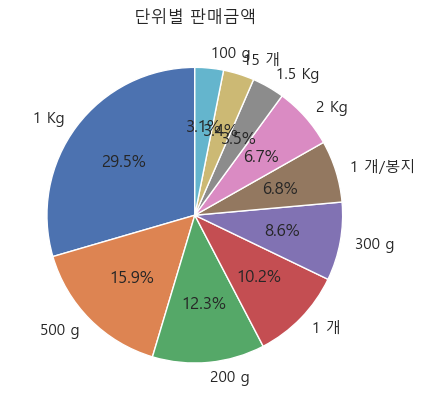

In [14]:
grouped_item = df.groupby(['단위'])['금액'].sum().sort_values(ascending=False)
top_items = grouped_item.iloc[:10]
print(top_items)

plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=90)
plt.title('단위별 판매금액')
plt.show()

### 단위별 판매금액을 봤을 때, 1kg, 500g, 200g이 절반을 넘음

### 판매연월일별 판매금액

In [15]:
df['시간'] = df['시간'].astype('str')   # 문자형으로 변경
df['시간'] = df['시간'].apply(lambda x: x.zfill(4))   # 520 -> 0520 네자리로 변경
combined_datetime = df['연월일'] + ' ' + df['시간']

df['판매연월일'] = pd.to_datetime(combined_datetime, format='%Y-%m-%d %H%M')
df = df.drop(columns=['연월일', '시간'])
print(df.head(3))

      매장        품목     단위       단가  수량     금액               판매연월일
0  하가직매장  표고버섯(배지)  200 g   3500.0   1   3500 2022-02-04 13:46:00
1  하가직매장        딸기   1 Kg  13000.0   1  13000 2022-02-04 13:46:00
2  하가직매장     새송이버섯  500 g   2900.0   1   2900 2022-02-04 13:46:00


In [16]:
df['판매월'] = df['판매연월일'].dt.month
df['판매시간대'] = df['판매연월일'].dt.hour
df['판매요일'] = df['판매연월일'].dt.day_name()
print(df.head(3))

      매장        품목     단위       단가  수량     금액               판매연월일  판매월  판매시간대  \
0  하가직매장  표고버섯(배지)  200 g   3500.0   1   3500 2022-02-04 13:46:00    2     13   
1  하가직매장        딸기   1 Kg  13000.0   1  13000 2022-02-04 13:46:00    2     13   
2  하가직매장     새송이버섯  500 g   2900.0   1   2900 2022-02-04 13:46:00    2     13   

     판매요일  
0  Friday  
1  Friday  
2  Friday  


In [17]:
print(df.dtypes)

매장               object
품목               object
단위               object
단가              float64
수량                int64
금액                int64
판매연월일    datetime64[ns]
판매월               int32
판매시간대             int32
판매요일             object
dtype: object


In [18]:
# 가장 판매금액이 많았던 날
grouped_day = df.groupby(['판매연월일'])['금액'].sum().sort_values(ascending=False)
print(grouped_day)

판매연월일
2021-11-23 19:57:00    29358000
2022-10-27 20:03:00    24324000
2021-10-26 18:32:00    14106960
2021-10-29 19:52:00     7041460
2021-11-23 20:03:00     6897000
                         ...   
2021-11-06 20:41:00         150
2021-10-24 08:10:00         150
2022-10-10 18:24:00         150
2022-08-29 19:50:00         150
2022-09-09 19:34:00         150
Name: 금액, Length: 767734, dtype: int64


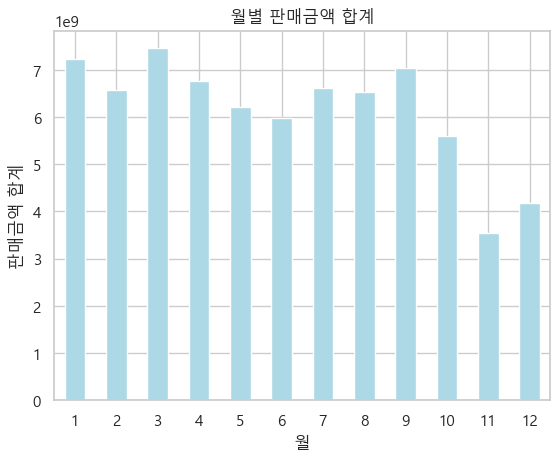

In [19]:
grouped_month = df.groupby(['판매월'])['금액'].sum().sort_index()
grouped_month.plot(kind='bar', color='lightblue')
plt.title('월별 판매금액 합계')
plt.xlabel('월')
plt.ylabel('판매금액 합계')
plt.xticks(rotation=0)
plt.show()

### 전체적으로 판매금액은 비슷하나 11월, 12월에 비교적 적은 것으로 보임

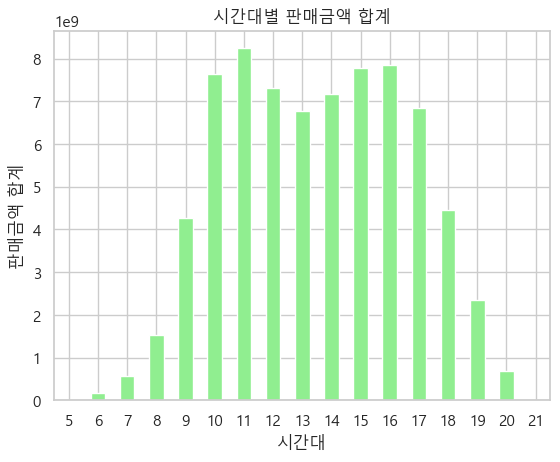

In [20]:
grouped_hour = df.groupby(['판매시간대'])['금액'].sum().sort_index()
grouped_hour.plot(kind='bar', color='lightgreen')
plt.title('시간대별 판매금액 합계')
plt.xlabel('시간대')
plt.ylabel('판매금액 합계')
plt.xticks(rotation=0)
plt.show()

### 10시에 17시까지 판매금액이 높은 것으로 보임
### 점심시간으로 생각되는 13시 이전에 판매금액이 감소하고, 13시 이후에 점차 증가함

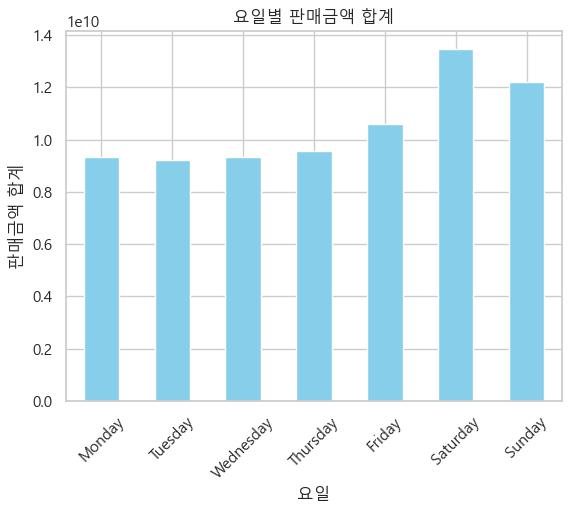

In [21]:
grouped_day_name = df.groupby(['판매요일'])['금액'].sum()
grouped_day_name = grouped_day_name.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]    #요일별 정렬
grouped_day_name.plot(kind='bar', color='skyblue')
plt.title('요일별 판매금액 합계')
plt.xlabel('요일')
plt.ylabel('판매금액 합계')
plt.xticks(rotation=45)
plt.show()

### 평일 판매금액은 비슷하나 금요일이 조금 높은 편이며, 주말 판매금액이 높음